In [9]:
import torch
from torch import nn

from matplotlib import pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

In [17]:
start = -1
stop = 1
step = 0.01

X = torch.arange(start, stop, step).unsqueeze(dim=1)

y = np.sin(X.numpy())
y = torch.from_numpy(y).float()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2985)

In [19]:
class myMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 32)
        self.act = nn.ReLU()
        self.output = nn.Linear(32, 1)
    def forward(self, x):
        x = self.hidden(x)
        x = self.act(x)
        x = self.output(x)
        return x


In [20]:
torch.manual_seed(2985)
model_1 = myMLP()
loss_fun = nn.L1Loss()
optim = torch.optim.Adam(params=model_1.parameters(),
                         lr=0.001)

In [21]:
loss_log = []
epochs = 1000
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fun(y_pred, y_train)
    loss_log.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fun(test_pred, y_test)
    if epoch % 100 == 0:
        print(test_loss.item())
        print(model_1.state_dict())

0.6949809789657593
OrderedDict([('hidden.weight', tensor([[-0.9273],
        [-0.1244],
        [-0.3364],
        [-0.2996],
        [ 0.9515],
        [-0.2773],
        [ 0.2863],
        [ 0.7074],
        [ 0.9535],
        [ 0.2482],
        [ 0.1682],
        [ 0.3427],
        [-0.3146],
        [ 0.6864],
        [ 0.8232],
        [-0.7519],
        [-0.0892],
        [ 0.8788],
        [ 0.9199],
        [ 0.2398],
        [ 0.4282],
        [ 0.2599],
        [ 0.0484],
        [ 0.8283],
        [-0.9058],
        [-0.1809],
        [-0.6641],
        [-0.2174],
        [ 0.3509],
        [ 0.3111],
        [-0.8080],
        [ 0.2534]])), ('hidden.bias', tensor([ 0.1489, -0.7787,  0.6370, -0.6583, -0.6159, -0.1123, -0.2655,  0.5479,
        -0.3675,  0.3911,  0.8285, -0.2534, -0.8134,  0.4041, -0.5377, -0.1555,
         0.5161,  0.4296,  0.7104,  0.6099, -0.4717,  0.4843,  0.2052, -0.0695,
        -0.7762,  0.8453, -0.3468,  0.6473, -0.5874, -0.8453, -0.1491,  0.4904])), 

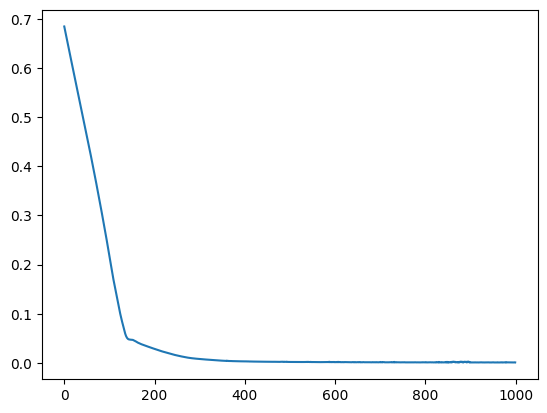

In [23]:
plt.plot([i for i in range(epochs)], loss_log)

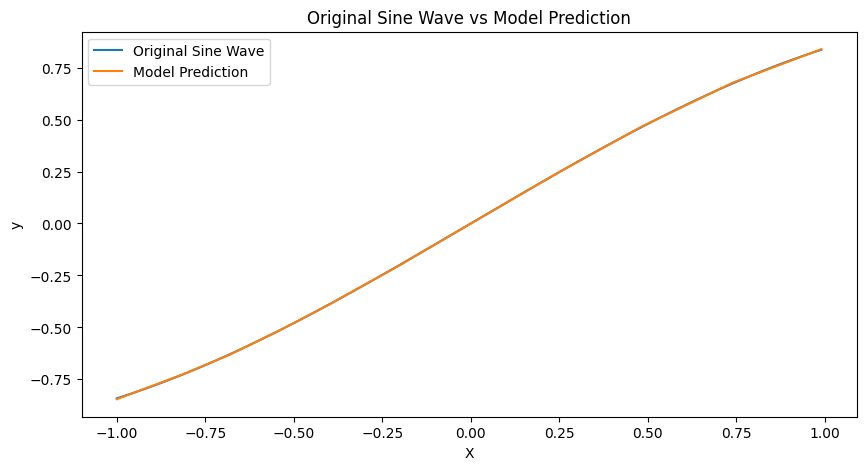

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(X.numpy(), y.numpy(), label='Original Sine Wave')
with torch.inference_mode():
    y_model = model_1(X)
plt.plot(X.numpy(), y_model.numpy(), label='Model Prediction')
plt.legend()
plt.title('Original Sine Wave vs Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.show()